In [3]:
#the data used is the iris dataset avaibale in the scikit-learn library
#the feature variables are the peta length, petal width, sepal length and sepal lengths of different leaves
#the dataset has three posible classes in the lebal variable namely setosa, versicolor and virginia

In [4]:
#random forest model building with python
#importing the scikit-learn dataset library
from sklearn import datasets

#loading the dataset
iris = datasets.load_iris()

In [13]:
#printing the names of label classes to confirm the dataset
print(iris.target_names)

#printing the names of the features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [21]:
#exploring the data
#printing the first five records of the feature variables
print(iris.data[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [12]:
#printing the the lables. 0 for setosa, 1 for versicolor and 2 for virginica 
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [17]:
#creating a dataframe for the dataset
import pandas as pd
dataset=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
dataset.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
#importing the train_test_split function
from sklearn.model_selection import train_test_split


x = data[["sepal length", "sepal width", "petal length", "petal width"]] #these are the feature variables
y = data["species"] # this is the label variable


#spliting the data into training dataset and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3) # Here 70% of data is use for training and 30% for testing

In [28]:
#training the random forest model


#importing the random forest classifier
from sklearn.ensemble import RandomForestClassifier

#creating a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)


#training the model using the trainin dataset  y_pred=clf.predict(X_test)
clf.fit(x_train, y_train)


y_pred=clf.predict(x_test)

In [31]:
#we now check the accuracy of te model by comparing the actual values of the model with the predicted values

#importing scikit-learn metrics module that is used for accuracy prediction
from sklearn import metrics

#cheking the model accuracy

print('The Accuracy is:',metrics.accuracy_score(y_test,y_pred))

The Accuracy is: 0.9111111111111111


In [35]:
# we can make prediction for a sigle item with given characteristics
#for example, when sepal length = 3, sepal width = 5, petal length = 4 and petal width = 2
#the prediction for the type of flower is
clf.predict([[3, 5, 4, 2]])

array([1])

In [36]:
#as shown above, the prediction is array 1 which we assigned to virsicolor type of flower

In [37]:
#we now determine the most important features used in the classification
#THE STEPS INVOLVED ARE:
# 1) creating the random forest
# 2) using the feature importance variable to see the feature importance scores
# 3) visualizing the importance using seaborn library

In [40]:
#importing the library
from sklearn.ensemble import RandomForestClassifier

#Creating a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

#training the model using the training datasets y_pred=clf.predict(x_test)
clf.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
import pandas as pd
feature_importance = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_importance

petal length (cm)    0.460921
petal width (cm)     0.426925
sepal length (cm)    0.087942
sepal width (cm)     0.024211
dtype: float64

In [47]:
#as shown above, petal length is the most important feature for the classification and the sepal width is the least important


In [ ]:
#visualizing the most important features
#we use a combination of matplotlib and seaorn libraries

No handles with labels found to put in legend.


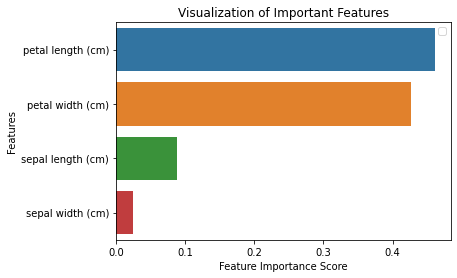

In [51]:
#importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#creating a barplot
sns.barplot(x=feature_importance, y=feature_importance.index)

#adding labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualization of Important Features")
plt.legend()
plt.show()

In [59]:
#buliding the model after removing the least importanmt feature(sepal width)

#again, we import the train_test_split function
from sklearn.model_selection import train_test_split

#spliting the data into features and label variables
x=data[['petal length', 'petal width','sepal length']]  # here i have demoved feature "sepal length"
y=data['species']

#spliting the dataset into training and testing dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.70, random_state=5) # here I have set 70% of data for training and for 30% testing

In [64]:
#building the model
#importing the random forest classifier
from sklearn.ensemble import RandomForestClassifier

#creating the Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

#training the model using the training sets y_pred = clf.predict(x_test)
clf.fit(x_train,y_train)

#making the predictions on the test set
y_pred=clf.predict(x_test)

#CALCULATING THE ACCURACY OF THE MODEL ON PREDICTION ON TESTING DATASET
#importing scikit-learn metrics module to do the calculation of accuracy
from sklearn import metrics

#accuracy level calculation
print("The attained accuracy using the most important featrures is: ",metrics.accuracy_score(y_test, y_pred))

The attained accuracy using the most important featrures is:  0.9523809523809523


In [65]:
#as seen above, the accuracy of prediction using the most important features (0.9523809523809523) is higher than the accuracy with of the prediction when all features were used ( 0.9111111111111111)
#the increase in accuracy is because the least important feature (sepal width) may have contained misleading data and noise. 
#also, the training time was shortened by reducing the features
#job done